# Lineas de transmisión

augur traits --output


* Substition rate (mu): 
    * tasa de sustitución en un contexto genético. Es una medida de la velocidad a la que un tipo de cambio genético, conocido como sustitución, ocurre en un sitio genético específico a lo largo del tiempo
* Equilibrium frequencies (pi_i): 
    * se refiere a las frecuencias de equilibrio en un modelo de evolución de secuencias12. En este contexto, “pi_i” podría representar la frecuencia de equilibrio del estado o residuo i en una secuencia12.
* Symmetrized rates from j->i (W_ij): 
    * En este contexto, “W_ij” podría representar una matriz de pesos que describe las interacciones o conexiones entre diferentes nodos en una red. El término “symmetrized” sugiere que la matriz ha sido ajustada de alguna manera para que sea simétrica, es decir, para que el peso de la conexión del nodo j al nodo i (W_ij) sea igual al peso de la conexión del nodo i al nodo j (W_ji) ???
* Actual rates from j->i (Q_ij): 
    * es un término que se utiliza en el campo de las cadenas de Markov en tiempo continuo1. En este contexto, “Q_ij” podría representar una matriz de tasas que describe las transiciones entre diferentes estados en una cadena de Markov1.La matriz Q, también conocida como la matriz del generador de una cadena de Markov en tiempo continuo, contiene información sobre las tasas de transición entre diferentes estados. Cada entrada Q_ij en la matriz representa la tasa a la que el sistema transita del estado j al estado i

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

In [3]:
z = '/home/ferambriz/Programs/ncov/results/custom-build/traitscountry.mugration_model.txt'
df = pd.read_csv(z, names = ['a'])

inicio = int(df[df['a'] == 'Map from character to field name'].index[0])
fin = int(df[df['a'].str.startswith('Substitution')].index[0]) - 1


df_countries = df.loc[inicio + 1 :fin ]
df_countries = df_countries['a'].str.split('\t', expand=True)

dict_countries = {}

for i in range(1, len(df_countries)+1):
    dict_countries[df_countries[0][i].split(':')[0]] = df_countries[1][i]
dict_countries

{'A': 'Andorra',
 'B': 'Argentina',
 'C': 'Australia',
 'D': 'Austria',
 'E': 'Bahrain',
 'F': 'Bangladesh',
 'G': 'Belarus',
 'H': 'Belgium',
 'I': 'Bosnia and Herzegovina',
 'J': 'Brazil',
 'K': 'Bulgaria',
 'L': 'Burkina Faso',
 'M': 'Cabo Verde',
 'N': 'Cameroon',
 'O': 'Canary Islands',
 'P': 'Chile',
 'Q': 'China',
 'R': 'Colombia',
 'S': 'Costa Rica',
 'T': 'Croatia',
 'U': 'Czech Republic',
 'V': 'Denmark',
 'W': 'Djibouti',
 'X': 'Dominican Republic',
 'Y': 'Egypt',
 'Z': 'El Salvador',
 '[': 'Estonia',
 '\\': 'Ethiopia',
 ']': 'Finland',
 '^': 'France',
 '_': 'Gabon',
 '`': 'Gambia',
 'a': 'Georgia',
 'b': 'Germany',
 'c': 'Ghana',
 'd': 'Greece',
 'e': 'Guam',
 'f': 'Guinea',
 'g': 'Hong Kong',
 'h': 'Iceland',
 'i': 'India',
 'j': 'Indonesia',
 'k': 'Iran',
 'l': 'Iraq',
 'm': 'Ireland',
 'n': 'Israel',
 'o': 'Italy',
 'p': 'Jamaica',
 'q': 'Japan',
 'r': 'Jordan',
 's': 'Kazakhstan',
 't': 'Kenya',
 'u': 'Kosovo',
 'v': 'Kuwait',
 'w': 'Laos',
 'x': 'Latvia',
 'y': 'Lebano

In [4]:
df_countries = df.loc[inicio + 1 :fin ]
df_countries = df_countries['a'].str.split('\t', expand=True)

dict_countries = {}

for i in range(1, len(df_countries)+1):
    dict_countries[df_countries[0][i].split(':')[0]] = df_countries[1][i]
dict_countries

{'A': 'Andorra',
 'B': 'Argentina',
 'C': 'Australia',
 'D': 'Austria',
 'E': 'Bahrain',
 'F': 'Bangladesh',
 'G': 'Belarus',
 'H': 'Belgium',
 'I': 'Bosnia and Herzegovina',
 'J': 'Brazil',
 'K': 'Bulgaria',
 'L': 'Burkina Faso',
 'M': 'Cabo Verde',
 'N': 'Cameroon',
 'O': 'Canary Islands',
 'P': 'Chile',
 'Q': 'China',
 'R': 'Colombia',
 'S': 'Costa Rica',
 'T': 'Croatia',
 'U': 'Czech Republic',
 'V': 'Denmark',
 'W': 'Djibouti',
 'X': 'Dominican Republic',
 'Y': 'Egypt',
 'Z': 'El Salvador',
 '[': 'Estonia',
 '\\': 'Ethiopia',
 ']': 'Finland',
 '^': 'France',
 '_': 'Gabon',
 '`': 'Gambia',
 'a': 'Georgia',
 'b': 'Germany',
 'c': 'Ghana',
 'd': 'Greece',
 'e': 'Guam',
 'f': 'Guinea',
 'g': 'Hong Kong',
 'h': 'Iceland',
 'i': 'India',
 'j': 'Indonesia',
 'k': 'Iran',
 'l': 'Iraq',
 'm': 'Ireland',
 'n': 'Israel',
 'o': 'Italy',
 'p': 'Jamaica',
 'q': 'Japan',
 'r': 'Jordan',
 's': 'Kazakhstan',
 't': 'Kenya',
 'u': 'Kosovo',
 'v': 'Kuwait',
 'w': 'Laos',
 'x': 'Latvia',
 'y': 'Lebano

In [5]:
def match_country(key):
    if key == '':
        return ''
    else: 
        return dict_countries[key]
def clean(s):
    if s == '':
        return ''
    else:
        return s.split('  ')[1]

In [8]:
z = '/home/ferambriz/Programs/ncov/results/custom-build/traitscountry.mugration_model.txt'
df = pd.read_csv(z, names = ['a'])

inicio = int(df[df['a'] == 'Symmetrized rates from j->i (W_ij):'].index[0])
fin = int(df[df['a'] == 'Actual rates from j->i (Q_ij):'].index[0])

simetrized_rates = df.loc[inicio + 1 :fin - 1]
simetrized_rates = simetrized_rates['a'].str.split('\t', expand=True)


# columns and rows names
simetrized_rates[0] = list(map(clean, simetrized_rates[0]))
simetrized_rates[0] = list(map(match_country, simetrized_rates[0]))
simetrized_rates.columns = simetrized_rates[0]
simetrized_rates = simetrized_rates.set_index('')

# cleaning
#simetrized_rates = simetrized_rates.drop([65], axis = 1)
simetrized_rates = simetrized_rates.drop('')
simetrized_rates

,Andorra,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Bosnia and Herzegovina,Brazil,...,U.S. Virgin Islands,USA,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam
,,,,,,,,,,,,,,,,,,,,,
Andorra,0,0.9664,0.9663,0.9663,0.9664,0.963,0.9664,0.9634,0.9664,0.9637,...,0.9663,0.9412,0.9659,0.9663,0.9034,0.9646,0.9664,0.9662,0.9664,0.9664
Argentina,0.9664,0,0.9663,0.9662,0.9664,0.9631,0.9664,0.9634,0.9663,0.9637,...,0.9662,1.4132,0.9659,0.9663,0.9062,0.9646,0.9663,0.9662,0.9663,0.9664
Australia,0.9663,0.9663,0,0.9665,0.9664,1.447,0.9663,0.9648,0.9663,1.0478,...,0.9664,4.7807,0.9662,0.9663,1.8665,0.9668,0.9663,0.9662,0.9663,0.9664
Austria,0.9663,0.9662,0.9665,0,0.9663,0.9639,0.9663,1.4781,0.9662,0.9646,...,0.9664,2.3848,0.9661,0.9662,1.4202,1.107,0.9662,0.9662,0.9662,0.9663
Bahrain,0.9664,0.9664,0.9664,0.9663,0,1.1407,0.9664,0.9641,0.9663,0.964,...,0.9662,0.9456,0.966,0.9663,1.0931,0.9654,0.9664,0.9662,0.9664,0.9664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.9646,0.9646,0.9668,1.107,0.9654,3.0246,0.9654,1.2392,1.2617,1.7789,...,1.4251,20.8701,1.5831,0.9652,8.8376,0,0.9646,1.0606,0.9647,0.9894
Uruguay,0.9664,0.9663,0.9663,0.9662,0.9664,0.963,0.9664,0.9634,0.9663,0.9637,...,0.9662,0.942,0.9659,0.9663,0.9044,0.9646,0,0.9662,0.9663,0.9664
Uzbekistan,0.9662,0.9662,0.9662,0.9662,0.9662,0.9653,0.9662,0.9656,0.9662,0.9655,...,0.9662,1.3678,0.9662,0.9662,10.1712,1.0606,0.9662,0,0.9662,0.9662


In [9]:
simetrized_rates.to_csv('../Data/matriz_simetrized_rates.tsv', sep = '\t')

In [7]:
# Obtener el número de columnas
num_cols = len(simetrized_rates.columns)

# Establecer la diagonal superior a 0
for i in range(num_cols):
    for j in range(i+1, num_cols):
        simetrized_rates.iloc[i, j] = 0
simetrized_rates

,Andorra,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Bosnia and Herzegovina,Brazil,...,U.S. Virgin Islands,USA,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam
,,,,,,,,,,,,,,,,,,,,,
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0.9664,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0.9663,0.9663,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0.9663,0.9662,0.9665,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bahrain,0.9664,0.9664,0.9664,0.9663,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.9646,0.9646,0.9668,1.107,0.9654,3.0246,0.9654,1.2392,1.2617,1.7789,...,1.4251,20.8701,1.5831,0.9652,8.8376,0,0,0,0,0
Uruguay,0.9664,0.9663,0.9663,0.9662,0.9664,0.963,0.9664,0.9634,0.9663,0.9637,...,0.9662,0.942,0.9659,0.9663,0.9044,0.9646,0,0,0,0
Uzbekistan,0.9662,0.9662,0.9662,0.9662,0.9662,0.9653,0.9662,0.9656,0.9662,0.9655,...,0.9662,1.3678,0.9662,0.9662,10.1712,1.0606,0.9662,0,0,0


In [13]:
simetrized_rates = simetrized_rates.reset_index()
simetrized_rates

,,Andorra,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Bosnia and Herzegovina,...,U.S. Virgin Islands,USA,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam
0,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Argentina,0.9664,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Australia,0.9663,0.9663,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Austria,0.9663,0.9662,0.9665,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bahrain,0.9664,0.9664,0.9664,0.9663,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,United Kingdom,0.9646,0.9646,0.9668,1.107,0.9654,3.0246,0.9654,1.2392,1.2617,...,1.4251,20.8701,1.5831,0.9652,8.8376,0,0,0,0,0
105,Uruguay,0.9664,0.9663,0.9663,0.9662,0.9664,0.963,0.9664,0.9634,0.9663,...,0.9662,0.942,0.9659,0.9663,0.9044,0.9646,0,0,0,0
106,Uzbekistan,0.9662,0.9662,0.9662,0.9662,0.9662,0.9653,0.9662,0.9656,0.9662,...,0.9662,1.3678,0.9662,0.9662,10.1712,1.0606,0.9662,0,0,0
107,Venezuela,0.9664,0.9663,0.9663,0.9662,0.9664,0.9634,0.9663,0.9636,0.9663,...,0.9662,0.9437,0.9659,0.9663,1.365,0.9647,0.9663,0.9662,0,0


In [17]:
cm = list(simetrized_rates.columns)
cm = cm[1:len(cm)]

In [30]:
sr = pd.melt(simetrized_rates, id_vars=[''], value_vars=cm)
sr.columns =  ['C1', 'C2', 'simetrized_rate']
sr['simetrized_rate'] = list(map(float, sr['simetrized_rate']))
sr = sr[sr['simetrized_rate'] > 0]
sr

,C1,C2,simetrized_rate
1,Argentina,Andorra,0.9664
2,Australia,Andorra,0.9663
3,Austria,Andorra,0.9663
4,Bahrain,Andorra,0.9664
5,Bangladesh,Andorra,0.9630
...,...,...,...
11552,Venezuela,Uruguay,0.9663
11553,Vietnam,Uruguay,0.9664
11661,Venezuela,Uzbekistan,0.9662
11662,Vietnam,Uzbekistan,0.9662


In [31]:
sr.to_csv('simetrized_rates.tsv', sep = '\t')

In [7]:
a = simetrized_rates.reset_index()
x = list(a.columns)
x = pd.melt(a, id_vars =x[0], value_vars =x[1:len(x)]) 
x['value'] = list(map(float, x['value']))
x = x[x['value'] > 0]
x = x.drop(['', 0], axis = 1)
x = float(x.mean()[0])
x

1.224978712198437

In [8]:
#================================================================
umbral = x
#================================================================
G = nx.Graph()

nodes = []
for column in simetrized_rates.columns:
    rows = simetrized_rates.index
    for row in rows:
        w = simetrized_rates.loc[row, column]
        if float(w) >= umbral:
            nodes.append(column)
            
             
for i in list(set(nodes)):
    G.add_node(i)
           

for column in simetrized_rates.columns:
    rows = simetrized_rates.index
    for row in rows:
        #print(column, row)
        w = simetrized_rates.loc[row, column]
        if float(w) >= umbral:
            G.add_edge(row, column, weight = float(w))

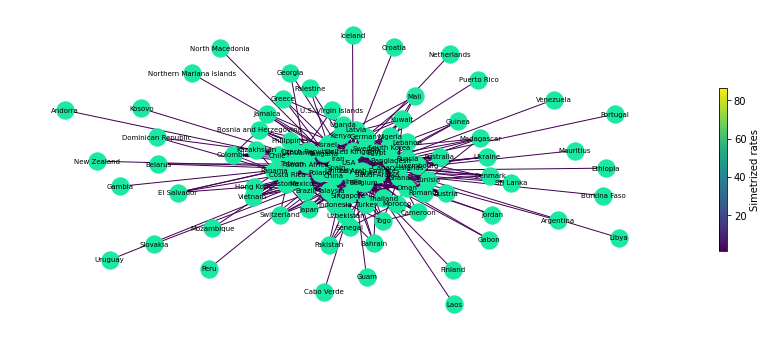

In [9]:
# Obtener los pesos de las aristas
edges = G.edges(data=True)
weights = [d['weight'] for u,v,d in edges]
#weights = [float(i) for i in weights]
weights = np.array(weights, dtype=float)

plt.figure(figsize=(15, 6))
pos = nx.spring_layout(G)  

# nodos
nx.draw_networkx_nodes(G, pos,node_color='#1AE9A4')

# aristas 
edge_colors = nx.draw_networkx_edges(G, pos, edge_color=weights)

# etiquetas
nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif', font_color='black')


# leyenda 
cbar = plt.colorbar(edge_colors, shrink=0.5)
cbar.set_label('Simetrized rates')

# Eliminar las líneas del borde
plt.axis('off')

#plt.savefig("SimetrizedRates.pdf", bbox_inches='tight')
plt.show()

In [10]:
weights

array([ 1.7071,  3.088 ,  1.5029,  2.4642,  1.4416,  3.3807,  1.7412,
        1.5888,  1.4731,  4.3031,  1.9433,  1.431 ,  5.8076,  8.6847,
        1.5856,  1.4397,  1.5861,  1.4461,  1.9228,  3.5202,  2.6224,
        1.9241,  1.5386,  5.2188,  1.444 ,  1.4451,  2.2954,  1.7861,
        1.5606,  3.0001,  1.2338,  3.5293, 13.6767,  1.2973,  2.2945,
        1.441 ,  1.4402,  1.4454,  1.7456,  1.4499,  2.6849,  1.5328,
       11.3893, 13.1203,  1.2846,  2.1482,  1.4384, 12.8878,  2.5325,
        1.2577,  1.3527,  1.3621,  1.2716,  1.3995,  1.4073,  1.4541,
        1.4457,  2.3574,  3.279 ,  3.4903,  3.0775,  9.3627,  1.984 ,
        3.5705,  1.9033,  2.0176,  1.7433,  4.0927,  1.2478,  1.8964,
        1.2298,  2.3494,  1.4447,  1.3714,  1.3396,  1.4387,  2.7954,
        2.6792,  1.3681,  1.3201,  1.544 ,  1.2713,  2.4108,  2.3538,
        6.5489,  4.484 ,  3.2214,  1.8527,  1.2254,  4.2502,  2.1208,
        1.7118,  1.2391,  4.3748,  1.4849,  6.8017,  2.2975,  1.6564,
        1.9353,  1.7

/tmp/ipykernel_8632/454133885.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


Etiquetas de los clústeres: [0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0]


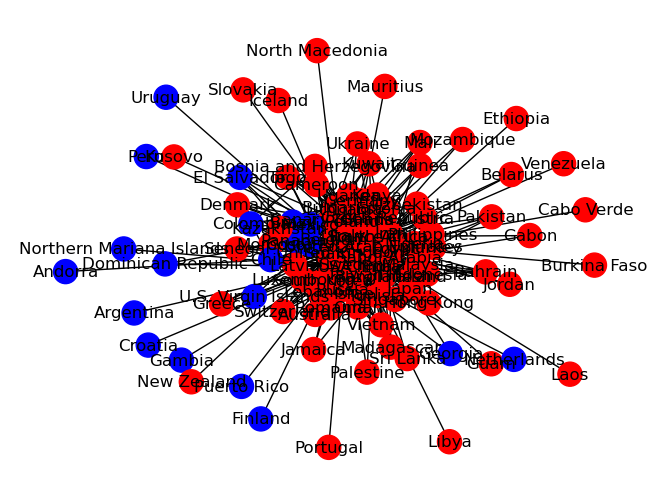

In [16]:
# Obtenemos la matriz de adyacencia
A = nx.adjacency_matrix(G).toarray()


# Aplicamos la agrupación espectral
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(A)

# Imprimimos las etiquetas de los clústeres
print('Etiquetas de los clústeres:', sc.labels_)

# Dibujamos el grafo con los nodos coloreados según su clúster
colors = ['red' if l == 0 else 'blue' if l == 1 else 'green' for l in sc.labels_]
nx.draw(G, with_labels=True, node_color=colors)
plt.show()

/tmp/ipykernel_8632/2439620451.py:12: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()
/tmp/ipykernel_8632/2439620451.py:23: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edge_colors = nx.draw_networkx_edges(G, pos, edge_color=weights)


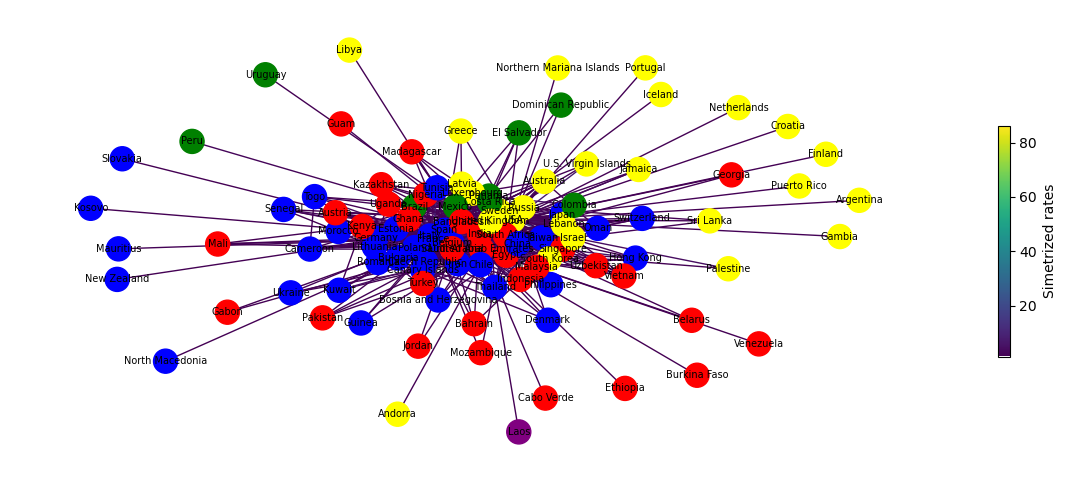

In [22]:
plt.figure(figsize=(15, 6))

pos = nx.spring_layout(G)  
colors = ['red' if l == 0 else 'blue' if l == 1 else 'green' if l == 2 else 'yellow' if l == 3 else 'purple' for l in sc.labels_]

## Obtener los pesos de las aristas
edges = G.edges(data=True)
weights = [d['weight'] for u,v,d in edges]
weights = np.array(weights, dtype=float)

# Obtenemos la matriz de adyacencia
A = nx.adjacency_matrix(G).toarray()

# Aplicamos la agrupación espectral
sc = SpectralClustering(5, affinity='precomputed', n_init=100)
sc.fit(A)


# Nodos
nx.draw_networkx_nodes(G, pos, node_color=colors)

# Aristas 
edge_colors = nx.draw_networkx_edges(G, pos, edge_color=weights)

# Etiquetas
nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif', font_color='black')

# Leyenda 
cbar = plt.colorbar(edge_colors, shrink=0.5)
cbar.set_label('Simetrized rates')

# Eliminar las líneas del borde
plt.axis('off')
plt.savefig("SimetrizedRates.pdf", bbox_inches='tight')
plt.show()